In [1]:
%load_ext autoreload
%autoreload 2

In [7]:
%matplotlib inline

In [12]:
import numpy as np

In [1]:
from rioniso.model import IsoCurve
from rioniso.importdata import ImportData
from rioniso.plotters import Plotters

In [2]:
exp_data_file = '/home/duskdawn/Downloads/72Ge-10-11s-2to21-2nd.npz'
simulated_data_file = '/home/duskdawn/analysis/72Ge/segundo-set-2023/72ge-2nd-off-isocurveinfo.ods'

In [6]:
exp_data_file = '/home/duskdawn/Downloads/72Ge-10-11s-2to21-2nd.npz'
simulated_data_file = '/home/duskdawn/analysis/72Ge/segundo-set-2023/72ge-2nd-off-isocurveinfo.ods'
imported_data = ImportData._import(simulated_data_file, exp_data_file, 10)
iso_data = IsoCurve(imported_data.simulated_data, imported_data.experimental_data)
plots = Plotters(iso_data.iso_data, iso_data.fit_range, iso_data.fit_values, iso_data.fit_parameters)

/home/duskdawn/anaconda3/envs/analysis_env/lib/python3.10/site-packages/rioniso/plotters.py:20: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


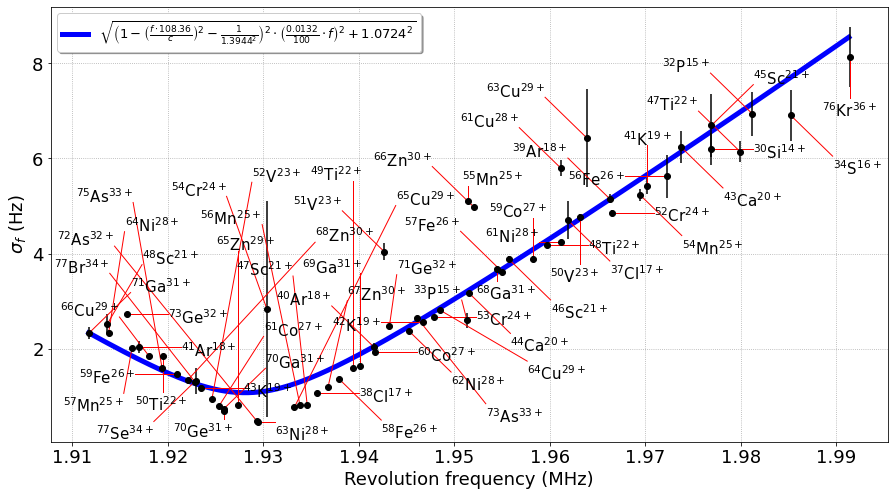

In [9]:
plots = Plotters(iso_data.iso_data, iso_data.fit_range, iso_data.fit_values, iso_data.fit_parameters)

In [14]:
np.column_stack((iso_data.iso_data, np.ones(len(iso_data.iso_data), dtype=bool)))


array([['$^{71}$Ga$^{31+}$', '1911710.9465764356', '0.12066641019948722',
        '2.3219664632641854', '0.12693925313638657', '86.03791485812593',
        '3.9275392364478208', 'True'],
       ['$^{48}$Sc$^{21+}$', '1913658.319632509', '0.18975267037453222',
        '2.519344128525678', '0.20057923450314336', '66.66692779713416',
        '4.41438609496791', 'True'],
       ['$^{64}$Ni$^{28+}$', '1913798.2692852896',
        '0.060947430400221894', '2.3362175948615675',
        '0.06413790983960736', '237.1750735457915', '5.435489711172086',
        'True'],
       ['$^{73}$Ge$^{32+}$', '1915665.3349976244', '0.0375697879629905',
        '2.7252837902420564', '0.03991558023157579', '1320.227466035891',
        '16.012245118007414', 'True'],
       ['$^{57}$Mn$^{25+}$', '1916247.012072117', '0.04650738503982648',
        '2.0124102165038877', '0.04856437627194027',
        '444.20997220085184', '9.004208224786051', 'True'],
       ['$^{41}$Ar$^{18+}$', '1917002.8190567673', '0.119134659

In [10]:
iso_data.iso_data

array([['$^{71}$Ga$^{31+}$', '1911710.9465764356', '0.12066641019948722',
        '2.3219664632641854', '0.12693925313638657', '86.03791485812593',
        '3.9275392364478208'],
       ['$^{48}$Sc$^{21+}$', '1913658.319632509', '0.18975267037453222',
        '2.519344128525678', '0.20057923450314336', '66.66692779713416',
        '4.41438609496791'],
       ['$^{64}$Ni$^{28+}$', '1913798.2692852896',
        '0.060947430400221894', '2.3362175948615675',
        '0.06413790983960736', '237.1750735457915', '5.435489711172086'],
       ['$^{73}$Ge$^{32+}$', '1915665.3349976244', '0.0375697879629905',
        '2.7252837902420564', '0.03991558023157579', '1320.227466035891',
        '16.012245118007414'],
       ['$^{57}$Mn$^{25+}$', '1916247.012072117', '0.04650738503982648',
        '2.0124102165038877', '0.04856437627194027',
        '444.20997220085184', '9.004208224786051'],
       ['$^{41}$Ar$^{18+}$', '1917002.8190567673', '0.11913465978234346',
        '2.0313141070729945', '0.1244